In [4]:
import numpy as np
from glob import glob
from astropy.io import fits, ascii
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D
from astropy import units as u
from astropy.coordinates import SkyCoord
import astropy
from astropy.visualization.wcsaxes import WCSAxes
from astropy.wcs.utils import skycoord_to_pixel, pixel_to_skycoord
from matplotlib.patches import Ellipse, Circle
from matplotlib.patheffects import withStroke
from matplotlib.patches import Wedge
from matplotlib.collections import PatchCollection

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmasher as cms

from regions import EllipseSkyRegion, RectangleSkyRegion

from matplotlib import rc
rc('text', usetex=True)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : '14'}
rc('font', **font)

from math import log10, floor
def round_sig(x, sig=2):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [2]:
# Load the spectral cube
cube = fits.open('J1348_630_12m+7m_13co10.fits')  # Replace 'filename.fits' with your file name
data = cube[0].data  # Access the data part of the FITS file

In [3]:
center = SkyCoord('13h48m12.739s', '-63d16m24.7s', frame='icrs')
box_bkg = [120*u.arcsecond,120*u.arcsecond]

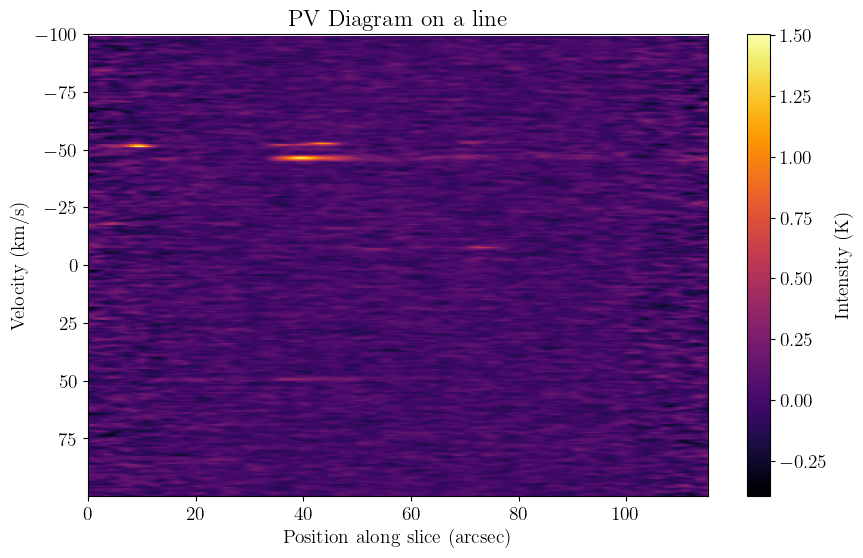

In [43]:
from spectral_cube import SpectralCube
from pvextractor import extract_pv_slice, Path
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.wcs import WCS
from astropy.wcs.utils import skycoord_to_pixel

# Load the spectral cube
cube = SpectralCube.read("J1348_630_12m+7m_13co10.fits")

# Extract the WCS from the cube
wcs = cube.wcs

# Define the start and end points in celestial coordinates
point1 = SkyCoord(ra=207.0483, dec=-63.259, unit="deg")  # Start point
point2 = SkyCoord(ra=207.0483, dec=-63.291, unit="deg")  # End point

# Convert SkyCoord points to pixel coordinates
point1_pix = skycoord_to_pixel(point1, wcs)
point2_pix = skycoord_to_pixel(point2, wcs)

# Create a path using pixel coordinates
path = Path([point1_pix, point2_pix], width=3 * u.arcsec)  # Adjust width as needed

# Extract the PV slice
pv_slice_hdu = extract_pv_slice(cube, path)  # Returns a PrimaryHDU object

# Extract the PV data and WCS
pv_data = pv_slice_hdu.data
pv_wcs = WCS(pv_slice_hdu.header)  # Build WCS from the header

# Compute velocity axis (linear interpolation)
n_channels = pv_data.shape[0]
v_start = 99.9727  # km/s at channel 0
v_end = -100.0  # km/s at channel 301
velocity_axis = v_start + (v_end - v_start) * (np.arange(n_channels) / (n_channels - 1))

# Convert intensity to Kelvin if not already in Kelvin
if cube.unit != u.K:
    cube = cube.to(u.K)

# Compute spatial axis in arcseconds
spatial_extent_arcsec = 115.2  # Total spatial extent in arcseconds
n_spatial_pixels = pv_data.shape[1]
spatial_axis = np.linspace(0, spatial_extent_arcsec, n_spatial_pixels)

# Plot the PV diagram with physical units
plt.figure(figsize=(10, 6))
plt.imshow(
    pv_data,
    origin="lower",
    aspect="auto",
    cmap="inferno",
    extent=[
        spatial_axis[0], spatial_axis[-1],  # Spatial axis range (arcsec or deg)
        velocity_axis[0], velocity_axis[-1],  # Velocity axis range (km/s)
    ],
)
plt.xlabel("Position along slice (arcsec)")
plt.ylabel("Velocity (km/s)")
plt.title("PV Diagram on a line")
plt.colorbar(label="Intensity (K)")
plt.show()



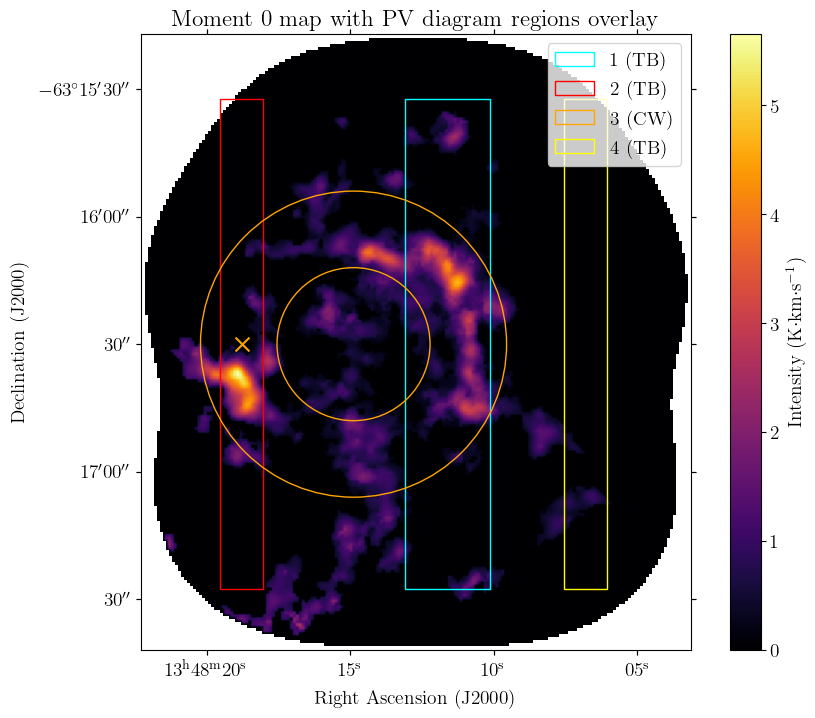

Figure saved as mom_0map_PVapertures.pdf


In [49]:
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import skycoord_to_pixel

# Load the FITS file
file_path = "J1348_630_12m+7m_13co10_strict_mom0.fits"
with fits.open(file_path) as hdul:
    header = hdul[0].header  # Update index if data isn't in the primary HDU
    data = hdul[0].data

# Load WCS info
wcs = WCS(header)

# Extract the start and end points of the line in RA/Dec
start_coord_1 = SkyCoord(ra=207.0483, dec=-63.259, unit="deg")  # Start point
end_coord_1 = SkyCoord(ra=207.0483, dec=-63.291, unit="deg")  # End point

# Width of the box in arcseconds
box_width_arcsec_1 = 20  # Total width
box_width_deg_1 = (box_width_arcsec_1 / 3600.0)  # Convert to degrees

# Convert the start and end coordinates to pixel values
start_pix_1 = skycoord_to_pixel(start_coord_1, wcs)
end_pix_1 = skycoord_to_pixel(end_coord_1, wcs)

# Define the rectangle center and size in pixel coordinates
x_center_1 = (start_pix_1[0] + end_pix_1[0]) / 2
y_center_1 = (start_pix_1[1] + end_pix_1[1]) / 2
box_length_pix_1 = abs(end_pix_1[1] - start_pix_1[1])  # Length of the rectangle in pixels
box_width_pix_1 = box_width_deg_1 / abs(header["CDELT2"])  # Convert width to pixels

# Extract the start and end points of the line in RA/Dec
start_coord_2 = SkyCoord(ra=207.0783, dec=-63.259, unit="deg")  # Start point
end_coord_2 = SkyCoord(ra=207.0783, dec=-63.291, unit="deg")  # End point

# Width of the box in arcseconds
box_width_arcsec_2 = 10  # Total width
box_width_deg_2 = (box_width_arcsec_2 / 3600.0)  # Convert to degrees

# Convert the start and end coordinates to pixel values
start_pix_2 = skycoord_to_pixel(start_coord_2, wcs)
end_pix_2 = skycoord_to_pixel(end_coord_2, wcs)

# Define the rectangle center and size in pixel coordinates
x_center_2 = (start_pix_2[0] + end_pix_2[0]) / 2
y_center_2 = (start_pix_2[1] + end_pix_2[1]) / 2
box_length_pix_2 = abs(end_pix_2[1] - start_pix_2[1])  # Length of the rectangle in pixels
box_width_pix_2 = box_width_deg_2 / abs(header["CDELT2"])  # Convert width to pixels

# Extract the start and end points of the line in RA/Dec
start_coord_4 = SkyCoord(ra=207.0283, dec=-63.259, unit="deg")  # Start point
end_coord_4 = SkyCoord(ra=207.0283, dec=-63.291, unit="deg")  # End point

# Width of the box in arcseconds
box_width_arcsec_4 = 10  # Total width
box_width_deg_4 = (box_width_arcsec_2 / 3600.0)  # Convert to degrees

# Convert the start and end coordinates to pixel values
start_pix_4 = skycoord_to_pixel(start_coord_4, wcs)
end_pix_4 = skycoord_to_pixel(end_coord_4, wcs)

# Define the rectangle center and size in pixel coordinates
x_center_4 = (start_pix_4[0] + end_pix_4[0]) / 2
y_center_4 = (start_pix_4[1] + end_pix_4[1]) / 2
box_length_pix_4 = abs(end_pix_4[1] - start_pix_4[1])  # Length of the rectangle in pixels
box_width_pix_4 = box_width_deg_4 / abs(header["CDELT2"])  # Convert width to pixels

# Plot the moment-0 map
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=wcs.celestial)
im = ax.imshow(data, origin="lower", cmap="inferno")
plt.colorbar(im, label="Intensity (K$\cdot$km$\cdot$s$^{-1}$)")
ax.set_xlabel("Right Ascension (J2000)")
ax.set_ylabel("Declination (J2000)")
plt.title(f"Moment 0 map with PV diagram regions overlay")

# Overlay the rectangle
rect_1 = Rectangle(
    (x_center_1 - box_width_pix_1 / 2, y_center_1 - box_length_pix_1 / 2),  # Bottom-left corner
    box_width_pix_1,  # Width
    box_length_pix_1,  # Height
    transform=ax.get_transform('pixel'),  # Ensure rectangle aligns with pixel grid
    edgecolor="cyan",
    facecolor="none",
    label="1 (TB)",
    linewidth=1,
)
ax.add_patch(rect_1)

rect_2 = Rectangle(
    (x_center_2 - box_width_pix_2 / 2, y_center_2 - box_length_pix_2 / 2),  # Bottom-left corner
    box_width_pix_2,  # Width
    box_length_pix_2,  # Height
    transform=ax.get_transform('pixel'),  # Ensure rectangle aligns with pixel grid
    edgecolor="red",
    facecolor="none",
    label="2 (TB)",
    linewidth=1,
)
ax.add_patch(rect_2)

# Define the radii of the annulus in arcseconds
radius = 27.0
width = 18.0
inner_radius_arcsec = radius - width/2.0
outer_radius_arcsec = radius + width/2.0
pixel_scale = np.abs(header['CDELT1']) * 3600 


centre_coord_3 = SkyCoord(ra=207.062, dec=-63.275, unit="deg")
centre_pix_3 = skycoord_to_pixel(centre_coord_3, wcs)

# Convert radii to pixels
inner_radius_pixels = inner_radius_arcsec / pixel_scale
outer_radius_pixels = outer_radius_arcsec / pixel_scale

circle_in = Circle(
    (centre_pix_3[0],centre_pix_3[1]), 
    radius=inner_radius_pixels, 
    transform=ax.get_transform('pixel'), 
    edgecolor='orange', 
    facecolor='none', 
    lw=1, 
    label="3 (CW)"
)
ax.add_patch(circle_in)

circle_out = Circle(
    (centre_pix_3[0],centre_pix_3[1]), 
    radius=outer_radius_pixels, 
    transform=ax.get_transform('pixel'), 
    edgecolor='orange', 
    facecolor='none', 
    lw=1, 
    
)
ax.add_patch(circle_out)

starting_coord_pix= [33.64683024, 102.16241988]
plt.scatter(*starting_coord_pix, color='orange', marker='x', s=100)


rect_4 = Rectangle(
    (x_center_4 - box_width_pix_4 / 2, y_center_4 - box_length_pix_4 / 2),  # Bottom-left corner
    box_width_pix_4,  # Width
    box_length_pix_4,  # Height
    transform=ax.get_transform('pixel'),  # Ensure rectangle aligns with pixel grid
    edgecolor="yellow",
    facecolor="none",
    label="4 (TB)",
    linewidth=1,
)
ax.add_patch(rect_4)

plt.legend()
plt.show()

output_filename = "mom_0map_PVapertures.pdf"
fig.savefig(
    output_filename,
    dpi=300,
    format="pdf",
    bbox_inches="tight",
    pad_inches=0.1,
    metadata={"Creator": "Matplotlib"},
)


print(f"Figure saved as {output_filename}")


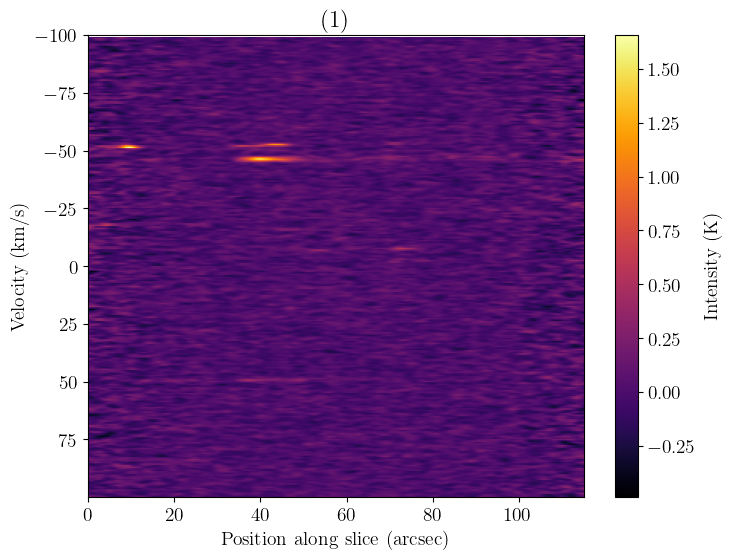

Figure saved as PV_1.pdf


In [50]:
from spectral_cube import SpectralCube
from pvextractor import extract_pv_slice, Path
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.wcs import WCS
from astropy.wcs.utils import skycoord_to_pixel

# Load the spectral cube
cube = SpectralCube.read("J1348_630_12m+7m_13co10.fits")

# Extract the WCS from the cube
wcs = cube.wcs

# Define the start and end points in celestial coordinates
point1 = SkyCoord(ra=207.0483, dec=-63.259, unit="deg")  # Start point
point2 = SkyCoord(ra=207.0483, dec=-63.291, unit="deg")  # End point

# Convert SkyCoord points to pixel coordinates
point1_pix = skycoord_to_pixel(point1, wcs)
point2_pix = skycoord_to_pixel(point2, wcs)

# Define the path for the rectangular box (5 arcseconds on both sides = total 10 arcseconds width)
path_width = 20 * u.arcsec  # Total width of the box
path = Path([point1_pix, point2_pix], width=path_width.to(u.deg).value)  # Width must be in degrees

# Extract the PV slice
pv_slice_hdu = extract_pv_slice(cube, path)  # Returns a PrimaryHDU object

# Extract the PV data and WCS
pv_data = pv_slice_hdu.data
pv_wcs = WCS(pv_slice_hdu.header)

# Compute velocity axis (linear interpolation)
n_channels = pv_data.shape[0]
v_start = 99.9727  # km/s at channel 0
v_end = -100.0  # km/s at channel 301
velocity_axis = v_start + (v_end - v_start) * (np.arange(n_channels) / (n_channels - 1))

# Compute spatial axis in arcseconds
spatial_extent_arcsec = 115.2  # Total spatial extent in arcseconds
n_spatial_pixels = pv_data.shape[1]
spatial_axis = np.linspace(0, spatial_extent_arcsec, n_spatial_pixels)

# Plot the PV diagram
fig = plt.figure(figsize=(8, 6))
plt.imshow(
    pv_data,
    origin="lower",
    aspect="auto",
    cmap="inferno",
    extent=[
        spatial_axis[0],
        spatial_axis[-1],  # Spatial axis in arcseconds
        velocity_axis[0],
        velocity_axis[-1],  # Velocity axis in km/s
    ],
)
plt.xlabel("Position along slice (arcsec)")
plt.ylabel("Velocity (km/s)")
plt.title("(1)")
plt.colorbar(label=f"Intensity ({cube.unit})")
plt.show()

output_filename = "PV_1.pdf"
fig.savefig(
    output_filename,
    dpi=300,
    format="pdf",
    bbox_inches="tight",
    pad_inches=0.1,
    metadata={"Creator": "Matplotlib"},
)


print(f"Figure saved as {output_filename}")

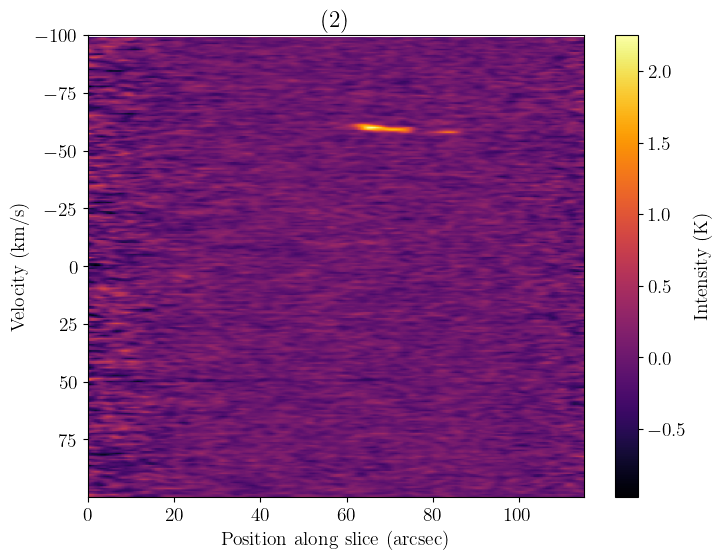

Figure saved as PV_2.pdf


In [51]:
from spectral_cube import SpectralCube
from pvextractor import extract_pv_slice, Path
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.wcs import WCS
from astropy.wcs.utils import skycoord_to_pixel

# Load the spectral cube
cube = SpectralCube.read("J1348_630_12m+7m_13co10.fits")

# Extract the WCS from the cube
wcs = cube.wcs

# Define the start and end points in celestial coordinates
point1_1 = SkyCoord(ra=207.0783, dec=-63.259, unit="deg")  # Start point
point2_1 = SkyCoord(ra=207.0783, dec=-63.291, unit="deg")  # End point

# Convert SkyCoord points to pixel coordinates
point1_pix_1 = skycoord_to_pixel(point1_1, wcs)
point2_pix_1 = skycoord_to_pixel(point2_1, wcs)

# Define the path for the rectangular box (5 arcseconds on both sides = total 10 arcseconds width)
path_width_1 = 20 * u.arcsec  # Total width of the box
path_1 = Path([point1_pix_1, point2_pix_1], width=path_width_1.to(u.deg).value)  # Width must be in degrees

# Extract the PV slice
pv_slice_hdu = extract_pv_slice(cube, path_1)  # Returns a PrimaryHDU object

# Extract the PV data and WCS
pv_data = pv_slice_hdu.data
pv_wcs = WCS(pv_slice_hdu.header)

# Compute velocity axis (linear interpolation)
n_channels = pv_data.shape[0]
v_start = 99.9727  # km/s at channel 0
v_end = -100.0  # km/s at channel 301
velocity_axis = v_start + (v_end - v_start) * (np.arange(n_channels) / (n_channels - 1))

# Compute spatial axis in arcseconds
spatial_extent_arcsec = 115.2  # Total spatial extent in arcseconds
n_spatial_pixels = pv_data.shape[1]
spatial_axis = np.linspace(0, spatial_extent_arcsec, n_spatial_pixels)

# Plot the PV diagram
fig = plt.figure(figsize=(8, 6))
plt.imshow(
    pv_data,
    origin="lower",
    aspect="auto",
    cmap="inferno",
    extent=[
        spatial_axis[0],
        spatial_axis[-1],  # Spatial axis in arcseconds
        velocity_axis[0],
        velocity_axis[-1],  # Velocity axis in km/s
    ],
)
plt.xlabel("Position along slice (arcsec)")
plt.ylabel("Velocity (km/s)")
plt.title("(2)")
plt.colorbar(label=f"Intensity ({cube.unit})")
plt.show()

output_filename = "PV_2.pdf"
fig.savefig(
    output_filename,
    dpi=300,
    format="pdf",
    bbox_inches="tight",
    pad_inches=0.1,
    metadata={"Creator": "Matplotlib"},
)


print(f"Figure saved as {output_filename}")

starting_coord_pix= (array(38.79526672), array(142.21811886))



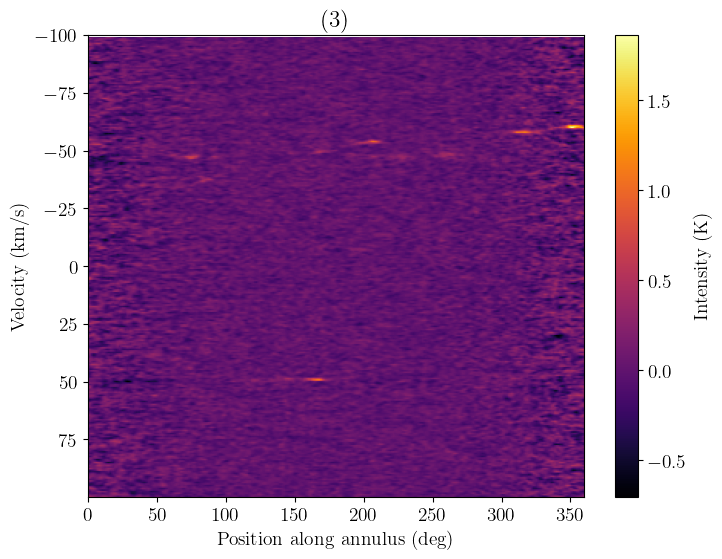

Figure saved as PV_3.pdf


In [52]:
from spectral_cube import SpectralCube
from pvextractor import extract_pv_slice, Path
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.wcs import WCS
from astropy.wcs.utils import skycoord_to_pixel
import numpy as np

# Load the spectral cube
cube = SpectralCube.read("J1348_630_12m+7m_13co10.fits")

# Extract the WCS from the cube
wcs = cube.wcs

# Define the center of the annulus
center = SkyCoord(ra=207.062, dec=-63.275, unit="deg")  # Center coordinate in celestial coords

# Define radii of the annulus
inner_radius = 18 * u.arcsec  # Inner radius
outer_radius = 36 * u.arcsec  # Outer radius
path_width = outer_radius - inner_radius  # Path width

# Number of points to sample along the circular path
n_points = 360  # One point per degree

# Generate points for the circular path at the outer radius
angles = np.linspace(0, 2 * np.pi, n_points)
circle_coords = SkyCoord(
    ra=center.ra + (outer_radius * np.cos(angles) / np.cos(center.dec)).to(u.deg),
    dec=center.dec + (outer_radius * np.sin(angles)).to(u.deg),
)

starting_coord = circle_coords[51]  # First point in celestial coordinates
starting_coord_pix = skycoord_to_pixel(starting_coord, wcs)  # Convert to pixel coordinates
print("starting_coord_pix=",starting_coord_pix)
# Convert celestial coordinates to pixel coordinates
circle_coords_pix = skycoord_to_pixel(circle_coords, wcs)

# Define the circular path with the width of the annulus
path = Path(list(zip(*circle_coords_pix)), width=path_width.to(u.deg).value)

# Extract the PV slice
pv_slice_hdu = extract_pv_slice(cube, path)

# Extract the PV data and WCS
pv_data = pv_slice_hdu.data
pv_wcs = WCS(pv_slice_hdu.header)

# Compute velocity axis (linear interpolation)
n_channels = pv_data.shape[0]
v_start = 99.9727  # km/s at channel 0
v_end = -100.0  # km/s at channel 301
velocity_axis = v_start + (v_end - v_start) * (np.arange(n_channels) / (n_channels - 1))

# Compute spatial axis in arcseconds
spatial_extent_arcsec = 360 # Circumference of the outer circle in arcseconds
n_spatial_pixels = pv_data.shape[1]
spatial_axis = np.linspace(0, spatial_extent_arcsec, n_spatial_pixels)

# Plot the PV diagram
fig = plt.figure(figsize=(8, 6))
plt.imshow(
    pv_data,
    origin="lower",
    aspect="auto",
    cmap="inferno",
    extent=[
        spatial_axis[0],
        spatial_axis[-1],  # Spatial axis in arcseconds
        velocity_axis[0],
        velocity_axis[-1],  # Velocity axis in km/s
    ],
)
plt.xlabel("Position along annulus (deg)")
plt.ylabel("Velocity (km/s)")
plt.title("(3)")
plt.colorbar(label=f"Intensity ({cube.unit})")
plt.show()

output_filename = "PV_3.pdf"
fig.savefig(
    output_filename,
    dpi=300,
    format="pdf",
    bbox_inches="tight",
    pad_inches=0.1,
    metadata={"Creator": "Matplotlib"},
)


print(f"Figure saved as {output_filename}")


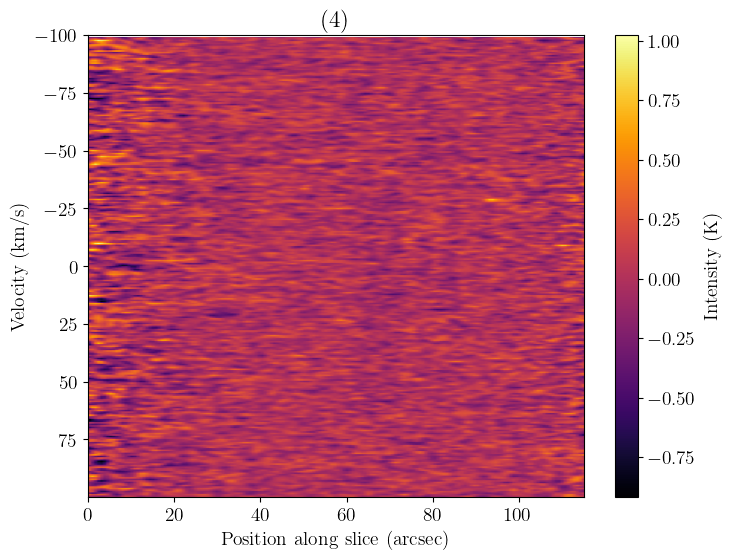

Figure saved as PV_4.pdf


In [54]:
from spectral_cube import SpectralCube
from pvextractor import extract_pv_slice, Path
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.wcs import WCS
from astropy.wcs.utils import skycoord_to_pixel

# Load the spectral cube
cube = SpectralCube.read("J1348_630_12m+7m_13co10.fits")

# Extract the WCS from the cube
wcs = cube.wcs

# Define the start and end points in celestial coordinates
point1_1 = SkyCoord(ra=207.0283, dec=-63.259, unit="deg")  # Start point
point2_1 = SkyCoord(ra=207.0283, dec=-63.291, unit="deg")  # End point

# Convert SkyCoord points to pixel coordinates
point1_pix_1 = skycoord_to_pixel(point1_1, wcs)
point2_pix_1 = skycoord_to_pixel(point2_1, wcs)

# Define the path for the rectangular box (5 arcseconds on both sides = total 10 arcseconds width)
path_width_1 = 20 * u.arcsec  # Total width of the box
path_1 = Path([point1_pix_1, point2_pix_1], width=path_width_1.to(u.deg).value)  # Width must be in degrees

# Extract the PV slice
pv_slice_hdu = extract_pv_slice(cube, path_1)  # Returns a PrimaryHDU object

# Extract the PV data and WCS
pv_data = pv_slice_hdu.data
pv_wcs = WCS(pv_slice_hdu.header)

# Compute velocity axis (linear interpolation)
n_channels = pv_data.shape[0]
v_start = 99.9727  # km/s at channel 0
v_end = -100.0  # km/s at channel 301
velocity_axis = v_start + (v_end - v_start) * (np.arange(n_channels) / (n_channels - 1))

# Compute spatial axis in arcseconds
spatial_extent_arcsec = 115.2  # Total spatial extent in arcseconds
n_spatial_pixels = pv_data.shape[1]
spatial_axis = np.linspace(0, spatial_extent_arcsec, n_spatial_pixels)

# Plot the PV diagram
fig = plt.figure(figsize=(8, 6))
plt.imshow(
    pv_data,
    origin="lower",
    aspect="auto",
    cmap="inferno",
    extent=[
        spatial_axis[0],
        spatial_axis[-1],  # Spatial axis in arcseconds
        velocity_axis[0],
        velocity_axis[-1],  # Velocity axis in km/s
    ],
)
plt.xlabel("Position along slice (arcsec)")
plt.ylabel("Velocity (km/s)")
plt.title("(4)")
plt.colorbar(label=f"Intensity ({cube.unit})")
plt.show()

output_filename = "PV_4.pdf"
fig.savefig(
    output_filename,
    dpi=300,
    format="pdf",
    bbox_inches="tight",
    pad_inches=0.1,
    metadata={"Creator": "Matplotlib"},
)


print(f"Figure saved as {output_filename}")

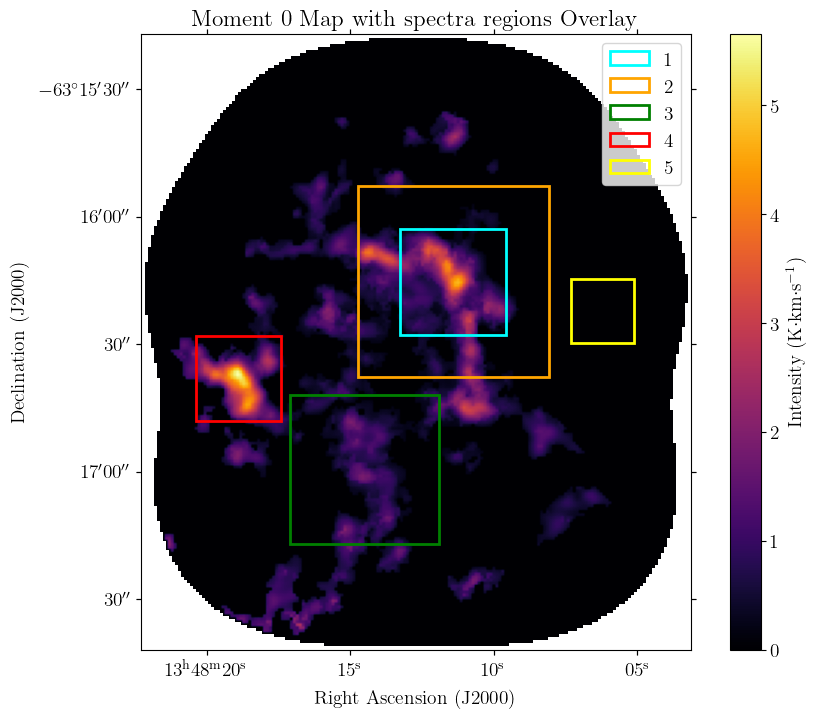

Figure saved as spectra_regions.pdf


In [55]:
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import skycoord_to_pixel

plt.rcParams['font.family'] = 'Times New Roman'


# Load the FITS file
file_path = "J1348_630_12m+7m_13co10_strict_mom0.fits"
with fits.open(file_path) as hdul:
    header = hdul[0].header  # Update index if data isn't in the primary HDU
    data = hdul[0].data

# Load WCS info
wcs = WCS(header)

# Define the center of the box in RA/Dec
center_coord1 = SkyCoord("13h48m11.4s", "-63d16m15.3s", frame="icrs")

# Convert the center to pixel coordinates
center_pixel1 = skycoord_to_pixel(center_coord1, wcs)

# Define the size of the box in arcseconds
box_size_arcsec1 = 25  # Side length in arcseconds
pixel_scale = abs(wcs.wcs.cdelt[1]) * 3600  # Pixel scale in arcseconds/pixel
box_size_pixels1 = box_size_arcsec1 / pixel_scale

# Calculate the lower-left corner of the box
x_center1, y_center1 = center_pixel1
half_size1 = box_size_pixels1 / 2
x_min1 = x_center1 - half_size1
y_min1 = y_center1 - half_size1

# Define the center of the box in RA/Dec
center_coord2 = SkyCoord("13h48m18.9s", "-63d16m38s", frame="icrs")

# Convert the center to pixel coordinates
center_pixel2 = skycoord_to_pixel(center_coord2, wcs)

# Define the size of the box in arcseconds
box_size_arcsec2 = 20  # Side length in arcseconds
pixel_scale = abs(wcs.wcs.cdelt[1]) * 3600  # Pixel scale in arcseconds/pixel
box_size_pixels2 = box_size_arcsec2 / pixel_scale

# Calculate the lower-left corner of the box
x_center2, y_center2 = center_pixel2
half_size2 = box_size_pixels2 / 2
x_min2 = x_center2 - half_size2
y_min2 = y_center2 - half_size2

# Define the center of the box in RA/Dec
center_coord3 = SkyCoord("13h48m14.5s", "-63d16m59.5s", frame="icrs")

# Convert the center to pixel coordinates
center_pixel3 = skycoord_to_pixel(center_coord3, wcs)

# Define the size of the box in arcseconds
box_size_arcsec3 = 35  # Side length in arcseconds
pixel_scale = abs(wcs.wcs.cdelt[1]) * 3600  # Pixel scale in arcseconds/pixel
box_size_pixels3 = box_size_arcsec3 / pixel_scale

# Calculate the lower-left corner of the box
x_center3, y_center3 = center_pixel3
half_size3 = box_size_pixels3 / 2
x_min3 = x_center3 - half_size3
y_min3 = y_center3 - half_size3

# Define the center of the box in RA/Dec
center_coord4 = SkyCoord("13h48m11.4s", "-63d16m15.3s", frame="icrs")

# Convert the center to pixel coordinates
center_pixel4 = skycoord_to_pixel(center_coord4, wcs)

# Define the size of the box in arcseconds
box_size_arcsec4 = 45  # Side length in arcseconds
pixel_scale = abs(wcs.wcs.cdelt[1]) * 3600  # Pixel scale in arcseconds/pixel
box_size_pixels4 = box_size_arcsec4 / pixel_scale

# Calculate the lower-left corner of the box
x_center4, y_center4 = center_pixel4
half_size4 = box_size_pixels4 / 2
x_min4 = x_center4 - half_size4
y_min4 = y_center4 - half_size4

# Define the center of the box in RA/Dec
center_coord5 = SkyCoord("13h48m06.2s", "-63d16m22.2s", frame="icrs")

# Convert the center to pixel coordinates
center_pixel5 = skycoord_to_pixel(center_coord5, wcs)

# Define the size of the box in arcseconds
box_size_arcsec5 = 15  # Side length in arcseconds
pixel_scale = abs(wcs.wcs.cdelt[1]) * 3600  # Pixel scale in arcseconds/pixel
box_size_pixels5 = box_size_arcsec5 / pixel_scale

# Calculate the lower-left corner of the box
x_center5, y_center5 = center_pixel5
half_size5 = box_size_pixels5 / 2
x_min5 = x_center5 - half_size5
y_min5 = y_center5 - half_size5


# Plot the moment-0 map
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=wcs.celestial)
im = ax.imshow(data, origin="lower", cmap="inferno")
plt.colorbar(im, label="Intensity (K$\cdot$km$\cdot$s$^{-1}$)")
ax.set_xlabel("Right Ascension (J2000)")
ax.set_ylabel("Declination (J2000)")
plt.title("Moment 0 Map with spectra regions Overlay")

# Add the box as a rectangle
rect1 = Rectangle(
    (x_min1, y_min1),  # Lower-left corner
    box_size_pixels1,  # Width
    box_size_pixels1,  # Height
    transform=ax.get_transform('pixel'),  # Transform to pixel coordinates
    edgecolor="cyan",
    facecolor="none",
    linewidth=2,
    label="1"
)
ax.add_patch(rect1)

rect4 = Rectangle(
    (x_min4, y_min4),  # Lower-left corner
    box_size_pixels4,  # Width
    box_size_pixels4,  # Height
    transform=ax.get_transform('pixel'),  # Transform to pixel coordinates
    edgecolor="orange",
    facecolor="none",
    linewidth=2,
    label="2"
)

ax.add_patch(rect4)


rect3 = Rectangle(
    (x_min3, y_min3),  # Lower-left corner
    box_size_pixels3,  # Width
    box_size_pixels3,  # Height
    transform=ax.get_transform('pixel'),  # Transform to pixel coordinates
    edgecolor="green",
    facecolor="none",
    linewidth=2,
    label="3"
)

ax.add_patch(rect3)

rect2 = Rectangle(
    (x_min2, y_min2),  # Lower-left corner
    box_size_pixels2,  # Width
    box_size_pixels2,  # Height
    transform=ax.get_transform('pixel'),  # Transform to pixel coordinates
    edgecolor="red",
    facecolor="none",
    linewidth=2,
    label="4"
)

ax.add_patch(rect2)

rect5 = Rectangle(
    (x_min5, y_min5),  # Lower-left corner
    box_size_pixels5,  # Width
    box_size_pixels5,  # Height
    transform=ax.get_transform('pixel'),  # Transform to pixel coordinates
    edgecolor="yellow",
    facecolor="none",
    linewidth=2,
    label="5"
)

ax.add_patch(rect5)

plt.legend()

plt.show()

# Save the figure
output_filename = "spectra_regions.pdf"
fig.savefig(
    output_filename,
    dpi=300,
    format="pdf",
    bbox_inches="tight",
    pad_inches=0.1,
    metadata={"Creator": "Matplotlib"},
)


print(f"Figure saved as {output_filename}")

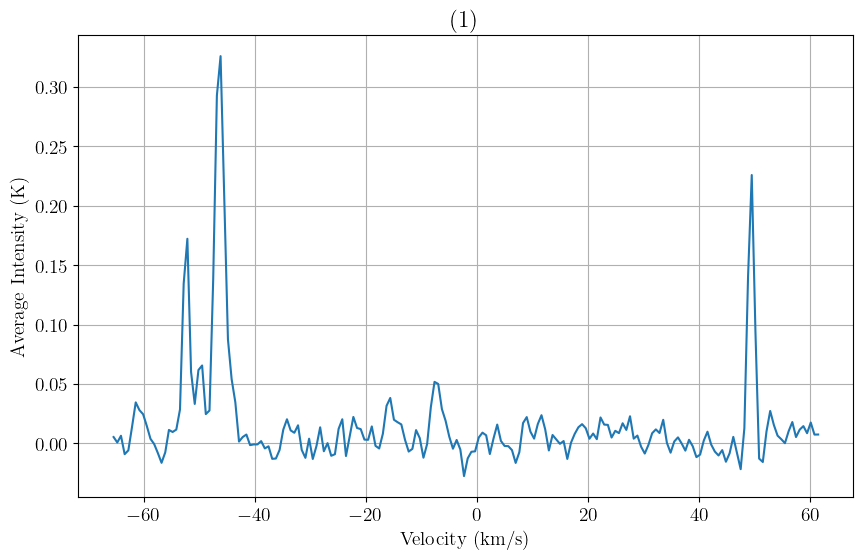

Figure saved as spectrum1.pdf


In [56]:
from spectral_cube import SpectralCube
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import skycoord_to_pixel
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'

# Load the spectral cube
cube = SpectralCube.read("J1348_630_12m+7m_13co10.fits")

# Define the center of the box in RA/Dec
center_coord = SkyCoord("13h48m11.4s", "-63d16m15.3s", frame="icrs")

# Convert the center to pixel coordinates
wcs = cube.wcs
center_pixel = skycoord_to_pixel(center_coord, wcs)

# Define the size of the square in pixels
box_size_arcsec = 25  # Side length in arcseconds
pixel_scale = abs(wcs.wcs.cdelt[1]) * 3600  # Pixel scale in arcseconds/pixel
box_size_pixels = box_size_arcsec / pixel_scale

# Calculate pixel limits for the box
x_center, y_center = center_pixel
half_size = box_size_pixels / 2
x_min = int(x_center - half_size)
x_max = int(x_center + half_size)
y_min = int(y_center - half_size)
y_max = int(y_center + half_size)

# Extract the box from the cube
subcube = cube[58:250, y_min:y_max, x_min:x_max]

# Compute the spectrum by averaging over the spatial dimensions
spectrum = subcube.mean(axis=(1, 2))

# Extract the velocity axis
velocity_axis = subcube.spectral_axis.to(u.km / u.s)

# Plot the spectrum
fig = plt.figure(figsize=(10, 6))
plt.plot(velocity_axis, spectrum, label="Extracted Spectrum")
plt.xlabel("Velocity (km/s)")
plt.ylabel("Average Intensity (K)")
plt.title("(1)")
#plt.legend()
plt.grid()
plt.show()

output_filename = "spectrum1.pdf"
fig.savefig(
    output_filename,
    dpi=300,
    format="pdf",
    bbox_inches="tight",
    pad_inches=0.1,
    metadata={"Creator": "Matplotlib"},
)


print(f"Figure saved as {output_filename}")


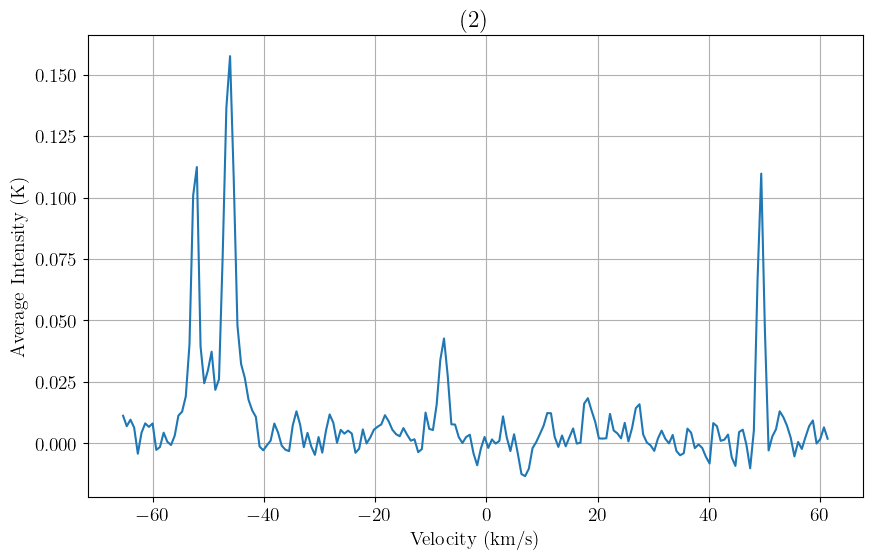

Figure saved as spectrum2.pdf


In [57]:
from spectral_cube import SpectralCube
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import skycoord_to_pixel
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'

# Load the spectral cube
cube = SpectralCube.read("J1348_630_12m+7m_13co10.fits")

# Define the center of the box in RA/Dec
center_coord = SkyCoord("13h48m11.4s", "-63d16m15.3s", frame="icrs")

# Convert the center to pixel coordinates
wcs = cube.wcs
center_pixel = skycoord_to_pixel(center_coord, wcs)

# Define the size of the square in pixels
box_size_arcsec = 45  # Side length in arcseconds
pixel_scale = abs(wcs.wcs.cdelt[1]) * 3600  # Pixel scale in arcseconds/pixel
box_size_pixels = box_size_arcsec / pixel_scale

# Calculate pixel limits for the box
x_center, y_center = center_pixel
half_size = box_size_pixels / 2
x_min = int(x_center - half_size)
x_max = int(x_center + half_size)
y_min = int(y_center - half_size)
y_max = int(y_center + half_size)

# Extract the box from the cube
subcube = cube[58:250, y_min:y_max, x_min:x_max]

# Compute the spectrum by averaging over the spatial dimensions
spectrum = subcube.mean(axis=(1, 2))

# Extract the velocity axis
velocity_axis = subcube.spectral_axis.to(u.km / u.s)

# Plot the spectrum
fig = plt.figure(figsize=(10, 6))
plt.plot(velocity_axis, spectrum, label="Extracted Spectrum")
plt.xlabel("Velocity (km/s)")
plt.ylabel("Average Intensity (K)")
plt.title("(2)")
#plt.legend()
plt.grid()
plt.show()

output_filename = "spectrum2.pdf"
fig.savefig(
    output_filename,
    dpi=300,
    format="pdf",
    bbox_inches="tight",
    pad_inches=0.1,
    metadata={"Creator": "Matplotlib"},
)


print(f"Figure saved as {output_filename}")

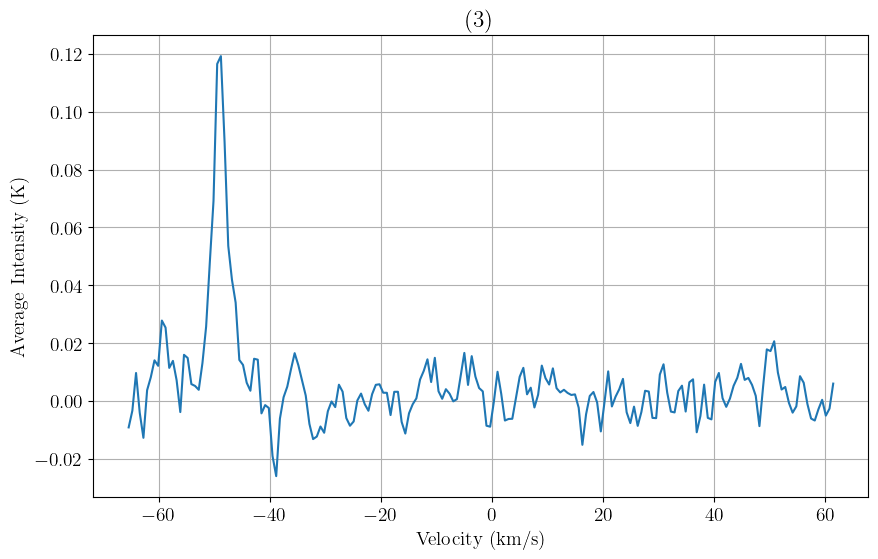

Figure saved as spectrum3.pdf


In [58]:
from spectral_cube import SpectralCube
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import skycoord_to_pixel
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['font.family'] = 'Times New Roman'

# Load the spectral cube
cube = SpectralCube.read("J1348_630_12m+7m_13co10.fits")

# Define the center of the box in RA/Dec
center_coord = SkyCoord("13h48m14.5s", "-63d16m59.5s", frame="icrs")

# Convert the center to pixel coordinates
wcs = cube.wcs
center_pixel = skycoord_to_pixel(center_coord, wcs)

# Define the size of the square in pixels
box_size_arcsec = 35  # Side length in arcseconds
pixel_scale = abs(wcs.wcs.cdelt[1]) * 3600  # Pixel scale in arcseconds/pixel
box_size_pixels = box_size_arcsec / pixel_scale

# Calculate pixel limits for the box
x_center, y_center = center_pixel
half_size = box_size_pixels / 2
x_min = int(x_center - half_size)
x_max = int(x_center + half_size)
y_min = int(y_center - half_size)
y_max = int(y_center + half_size)

# Extract the box from the cube
subcube = cube[58:250, y_min:y_max, x_min:x_max]

# Compute the spectrum by averaging over the spatial dimensions
spectrum = subcube.mean(axis=(1, 2))

# Extract the velocity axis
velocity_axis = subcube.spectral_axis.to(u.km / u.s)

# Plot the spectrum
fig = plt.figure(figsize=(10, 6))
plt.plot(velocity_axis, spectrum, label="Extracted Spectrum")
plt.xlabel("Velocity (km/s)")
plt.ylabel("Average Intensity (K)")
plt.title("(3)")
#plt.legend()
plt.grid()
plt.show()

output_filename = "spectrum3.pdf"
fig.savefig(
    output_filename,
    dpi=300,
    format="pdf",
    bbox_inches="tight",
    pad_inches=0.1,
    metadata={"Creator": "Matplotlib"},
)


print(f"Figure saved as {output_filename}")

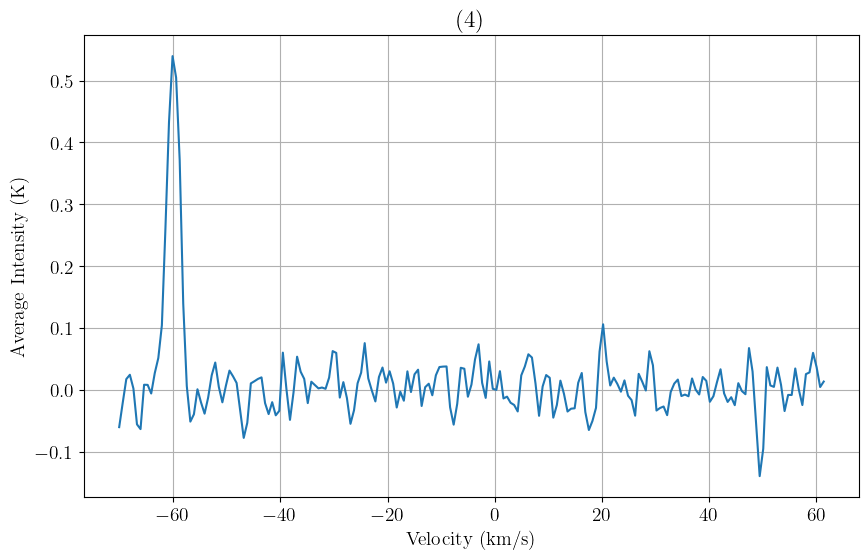

Figure saved as spectrum4.pdf


In [59]:
from spectral_cube import SpectralCube
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import skycoord_to_pixel
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'

# Load the spectral cube
cube = SpectralCube.read("J1348_630_12m+7m_13co10.fits")

# Define the center of the box in RA/Dec
center_coord = SkyCoord("13h48m18.9s", "-63d16m38s", frame="icrs")

# Convert the center to pixel coordinates
wcs = cube.wcs
center_pixel = skycoord_to_pixel(center_coord, wcs)

# Define the size of the square in pixels
box_size_arcsec = 20  # Side length in arcseconds
pixel_scale = abs(wcs.wcs.cdelt[1]) * 3600  # Pixel scale in arcseconds/pixel
box_size_pixels = box_size_arcsec / pixel_scale

# Calculate pixel limits for the box
x_center, y_center = center_pixel
half_size = box_size_pixels / 2
x_min = int(x_center - half_size)
x_max = int(x_center + half_size)
y_min = int(y_center - half_size)
y_max = int(y_center + half_size)

# Extract the box from the cube
subcube = cube[58:257, y_min:y_max, x_min:x_max]

# Compute the spectrum by averaging over the spatial dimensions
spectrum = subcube.mean(axis=(1, 2))

# Extract the velocity axis
velocity_axis = subcube.spectral_axis.to(u.km / u.s)

# Plot the spectrum
fig = plt.figure(figsize=(10, 6))
plt.plot(velocity_axis, spectrum, label="(2)")
plt.xlabel("Velocity (km/s)")
plt.ylabel("Average Intensity (K)")
plt.title("(4)")
#plt.legend()
plt.grid()
plt.show()

output_filename = "spectrum4.pdf"
fig.savefig(
    output_filename,
    dpi=300,
    format="pdf",
    bbox_inches="tight",
    pad_inches=0.1,
    metadata={"Creator": "Matplotlib"},
)


print(f"Figure saved as {output_filename}")

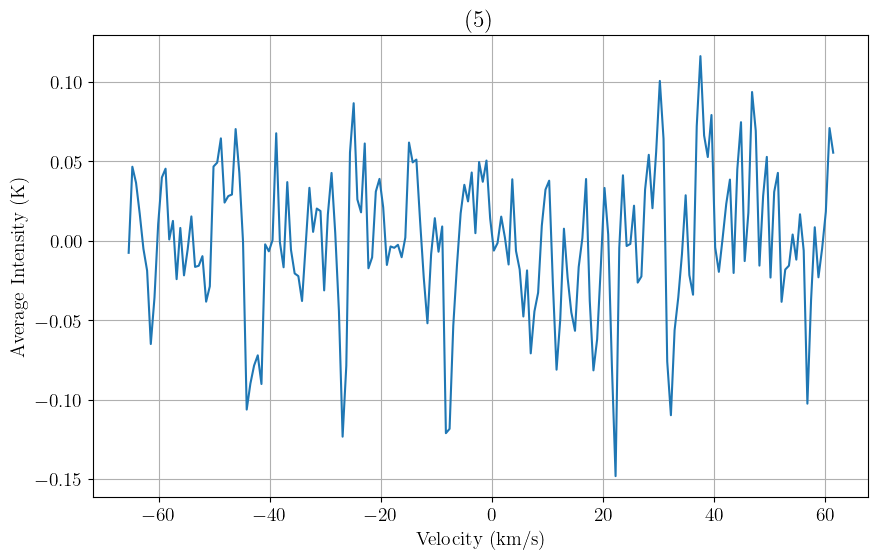

Figure saved as spectrum5.pdf


In [60]:
from spectral_cube import SpectralCube
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import skycoord_to_pixel
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'

# Load the spectral cube
cube = SpectralCube.read("J1348_630_12m+7m_13co10.fits")

# Define the center of the box in RA/Dec
center_coord = SkyCoord("13h48m06.2s", "-63d16m22.2s", frame="icrs")

# Convert the center to pixel coordinates
wcs = cube.wcs
center_pixel = skycoord_to_pixel(center_coord, wcs)

# Define the size of the square in pixels
box_size_arcsec = 15  # Side length in arcseconds
pixel_scale = abs(wcs.wcs.cdelt[1]) * 3600  # Pixel scale in arcseconds/pixel
box_size_pixels = box_size_arcsec / pixel_scale

# Calculate pixel limits for the box
x_center, y_center = center_pixel
half_size = box_size_pixels / 2
x_min = int(x_center - half_size)
x_max = int(x_center + half_size)
y_min = int(y_center - half_size)
y_max = int(y_center + half_size)

# Extract the box from the cube
subcube = cube[58:250, y_min:y_max, x_min:x_max]

# Compute the spectrum by averaging over the spatial dimensions
spectrum = subcube.mean(axis=(1, 2))

# Extract the velocity axis
velocity_axis = subcube.spectral_axis.to(u.km / u.s)

# Plot the spectrum
fig = plt.figure(figsize=(10, 6))
plt.plot(velocity_axis, spectrum, label="Extracted Spectrum")
plt.xlabel("Velocity (km/s)")
plt.ylabel("Average Intensity (K)")
plt.title("(5)")
#plt.legend()
plt.grid()
plt.show()

output_filename = "spectrum5.pdf"
fig.savefig(
    output_filename,
    dpi=300,
    format="pdf",
    bbox_inches="tight",
    pad_inches=0.1,
    metadata={"Creator": "Matplotlib"},
)


print(f"Figure saved as {output_filename}")